## **Binary Classification**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [39]:
df = pd.read_csv("sample_data/social_buying.csv")

In [40]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [65]:
# Test dataframe

df[df['Purchased']==0].count()

df[df['Purchased']==1].count()

,0
Age,143
EstimatedSalary,143
Purchased,143


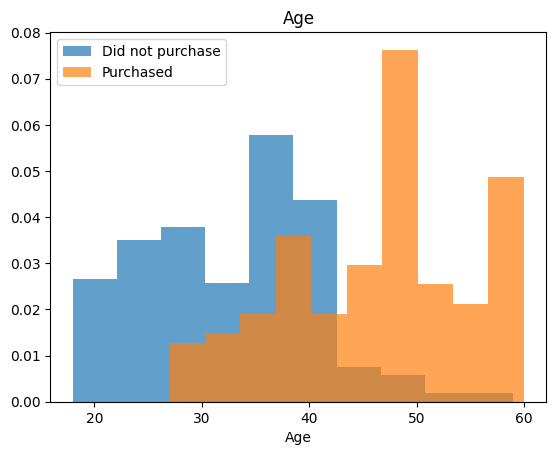

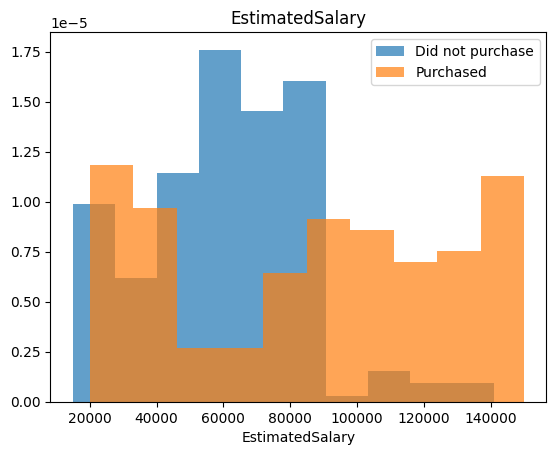

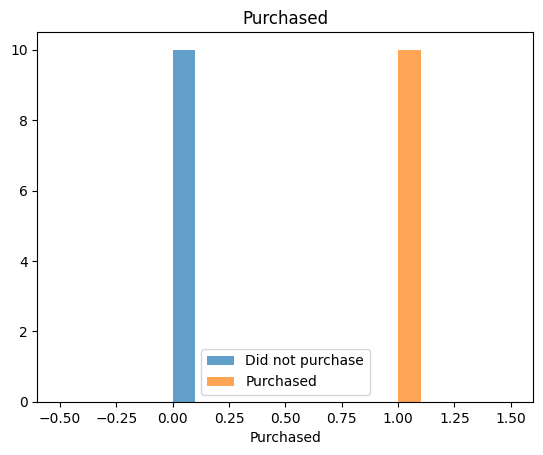

In [43]:
# try to find correlations

for i in range(len(df.columns)):
  label = df.columns[i]
  plt.hist(df[df['Purchased']==0][label],  label  = "Did not purchase", alpha = 0.7, density=True)
  plt.hist(df[df['Purchased']==1][label], label ="Purchased", alpha = 0.7, density=True)
  plt.title(label)
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [44]:
# separate out features and labels

x= df[:]
y=x.pop('Purchased')

In [45]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [57]:
# scale the data

scaler = StandardScaler()
x=scaler.fit_transform(x)
x[:5]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

In [59]:
# sample data to equal number of purchased and non purchased
# for this example, purchased was 143 and non purchased is 253.
# to make it equal, we use sampler

over = RandomOverSampler()
x, y = over.fit_resample(x, y)

In [60]:
# split the dataset into train, test and validation set

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.4, random_state = 0)
x_test, x_valid, y_test, y_valid = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 0)

In [61]:
# create the model

model =tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid") # sigmoid outputs to 1 or 0
])

In [62]:
# Add loss function, metrics and optimizers

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics = ["accuracy"])

In [63]:
# train the model

model.fit(x_train, y_train, batch_size = 16, epochs = 20, validation_data = (x_valid, y_valid))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5072 - loss: 0.6812 - val_accuracy: 0.6990 - val_loss: 0.6393
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7794 - loss: 0.6390 - val_accuracy: 0.8252 - val_loss: 0.5980
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8262 - loss: 0.5949 - val_accuracy: 0.8350 - val_loss: 0.5624
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8383 - loss: 0.5597 - val_accuracy: 0.8350 - val_loss: 0.5304
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8597 - loss: 0.5146 - val_accuracy: 0.8350 - val_loss: 0.5030
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8799 - loss: 0.4761 - val_accuracy: 0.8350 - val_loss: 0.4784
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8704 - loss: 0.4363 - val_accuracy: 0.8350 - val_loss: 0.4566
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8549 - loss: 0.4303 - val_accuracy: 0.8447 - val_loss

In [66]:
# evaluate model

model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9262 - loss: 0.2450 


[0.2534642517566681, 0.9223300814628601]